## Automatic labeling
This notebook guides you through the process of labeling and exporting a first version of the dataset.
- ❗️ WARNING: This notebook assumes that you have a specific folder or set of folders which respects the example provided in `/data/folder_example.png`. See section "*2-bis Google Earth Generation*" in README for more information. 

In [1]:
from pathlib import Path

from src.tools.visu_utils import display_img_with_labels
from src.labeling.export_config import ExportConfig, DatasetTypes
from src.labeling.generate_dataset import export_datasets
from src.labeling.earth_studio_export import export_labels
from src.labeling.labels import Labels

### Creating the export configuration
This step requires to fill in the following data:
- `dataset_name` is the name you want for output, labeled dataset
- `output_directory` is where the labeled dataset will be saved

Then the method `add_dataset_for_export` allows to add a directory with possibly multiple datasets.

Troubleshoot:
- *Images for which at least one corner of the bounding box is outside of the pictures are tagged as invalid and skipped*
- *Scenarios for which the yaml or the esp file cannot be found are skipped*
- *Scenarios for which the runway cannot be found in the runways_database are skipped (again, runway '01' is not the same as runway '1')* 

In [2]:
config = ExportConfig(strict=False)
config.dataset_name = "train_dataset"
os.makedirs("datasets", exist_ok=True)
config.output_directory = "datasets"
config.add_dataset_for_export(dataset_name="train", # The name of the input dataset
                              dataset_folder = "scenarios", # The folder where the input dataset should be 
                              records_dirpath = "records", # Where generated samples are stored
                              dataset_type = DatasetTypes.EARTH_STUDIO) # Type of dataset, either REAL or EARTH_STUDIO for now.
# Once the configuration is exported, export can be started
export_datasets(config)

Label export of scenarios/KFLL_10R-28L_500.yaml started
Label export of scenarios/SKBO_31L-13R_500.yaml started
Label export of scenarios/SKBO_31R-13L_500.yaml started
Label export of scenarios/RPLL_06-24_500.yaml started
Label export of scenarios/OERK_33R-15L_500.yaml started
Label export of scenarios/OERK_33L-15R_500.yaml started
Label export of scenarios/ZGGG_02L-20R_500.yaml started
Label export of scenarios/ZGGG_02R-20L_500.yaml started
Label export of scenarios/MMMX_05R-23L_500.yaml started
Label export of scenarios/VOBL_09R-27L_500.yaml started
Label export of scenarios/VOBL_09L-27R_500.yaml started
Label export of scenarios/VVTS_07L-25R_500.yaml started
Label export of scenarios/VVTS_07R-25L_500.yaml started
Label export of scenarios/ZGGG_01-19_500.yaml started
Label export of scenarios/RPLL_13-31_500.yaml started


## Advanced usages

- Export from a yaml configuration file:

In [ ]:
config = ExportConfig("params/export_test_dataset.yaml")
export_datasets(config)

- generate a single label file from a single earth studio scenario :

In [3]:
yaml_config = Path("scenarios/SAEZ_test_17/SAEZ_test_17.yaml")
export_labels(yaml_config)

Label export of scenarios\SAEZ_test_17\SAEZ_test_17.yaml started
Skipping invalid image : scenarios\SAEZ_test_17\footage\SAEZ_test_17_46.jpeg
Skipping invalid image : scenarios\SAEZ_test_17\footage\SAEZ_test_17_47.jpeg
Skipping invalid image : scenarios\SAEZ_test_17\footage\SAEZ_test_17_48.jpeg
Skipping invalid image : scenarios\SAEZ_test_17\footage\SAEZ_test_17_49.jpeg


- Generate a SINGLE dataset from multiple scenarios directories:

In [ ]:
config = ExportConfig()
config.dataset_name = "test_dataset"
config.output_directory = "data"
config.add_dataset_for_export(dataset_name="LARD_Real",
                              dataset_folder = "scenarios/test/LARD_Test_Real",
                             dataset_type = DatasetTypes.REAL)
config.add_dataset_for_export(dataset_name="LARD_Synth",
                              dataset_folder = "scenarios/test/LARD_Test_Synth",
                             dataset_type = DatasetTypes.EARTH_STUDIO)
export_datasets(config)

- Export in command lines rather than notebook:
```
python src\labeling\generate_dataset.py params/export_test_dataset.yaml
```

## Sanity check

The following will guide you through verifying the export result and the associated metadata

In [5]:
dataset_folder = Path("data/train_dataset")
labels_file = dataset_folder / "train_dataset.csv"

dataset_labels = Labels(labels_file)
        
# The directory where you want to save labelled pictures (if not, put at None):
save_directory = dataset_folder / "sanity_check"

In [6]:
# output metadata for a single element
dataset_labels.get_label(20)

{'image': 'images/SAEZ_test_17_20.jpeg',
 'height': 2648,
 'width': 2448,
 'type': 'earth_studio',
 'original_dataset': 'SAEZ_test',
 'scenario': 'SAEZ_test_17',
 'airport': 'SAEZ',
 'runway': 17,
 'time_to_landing': nan,
 'weather': nan,
 'night': nan,
 'time': '2020-01-01 12:01:01',
 'slant_distance': 1.59,
 'along_track_distance': 1.59,
 'height_above_runway': 559.08,
 'lateral_path_angle': -1.15,
 'vertical_path_angle': 3.0,
 'yaw': 171.5353023711656,
 'pitch': 85.93595452572494,
 'roll': -1.762980759666699,
 'watermark_height': 300,
 'x_A': 698,
 'y_A': 1170,
 'x_B': 724,
 'y_B': 1171,
 'x_C': 613,
 'y_C': 1265,
 'x_D': 666,
 'y_D': 1267}

Displaying  images/SAEZ_test_17_05.jpeg


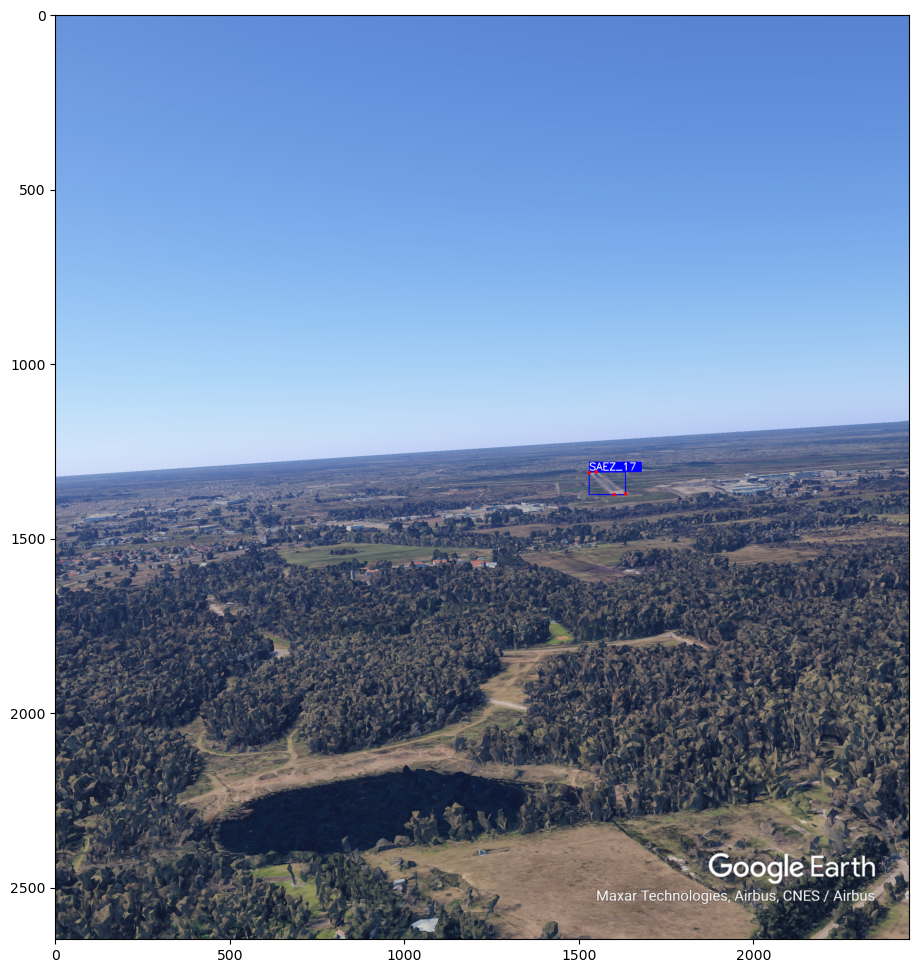

Displaying  images/SAEZ_test_17_20.jpeg


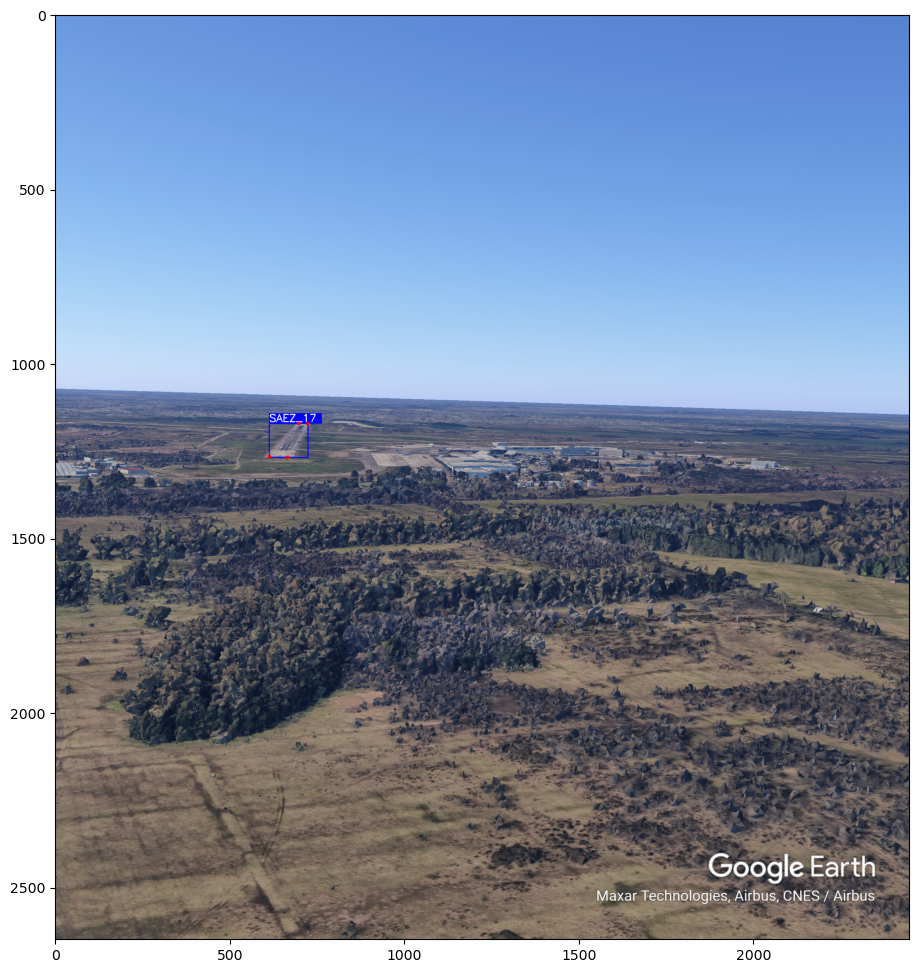

Displaying  images/SAEZ_test_17_28.jpeg


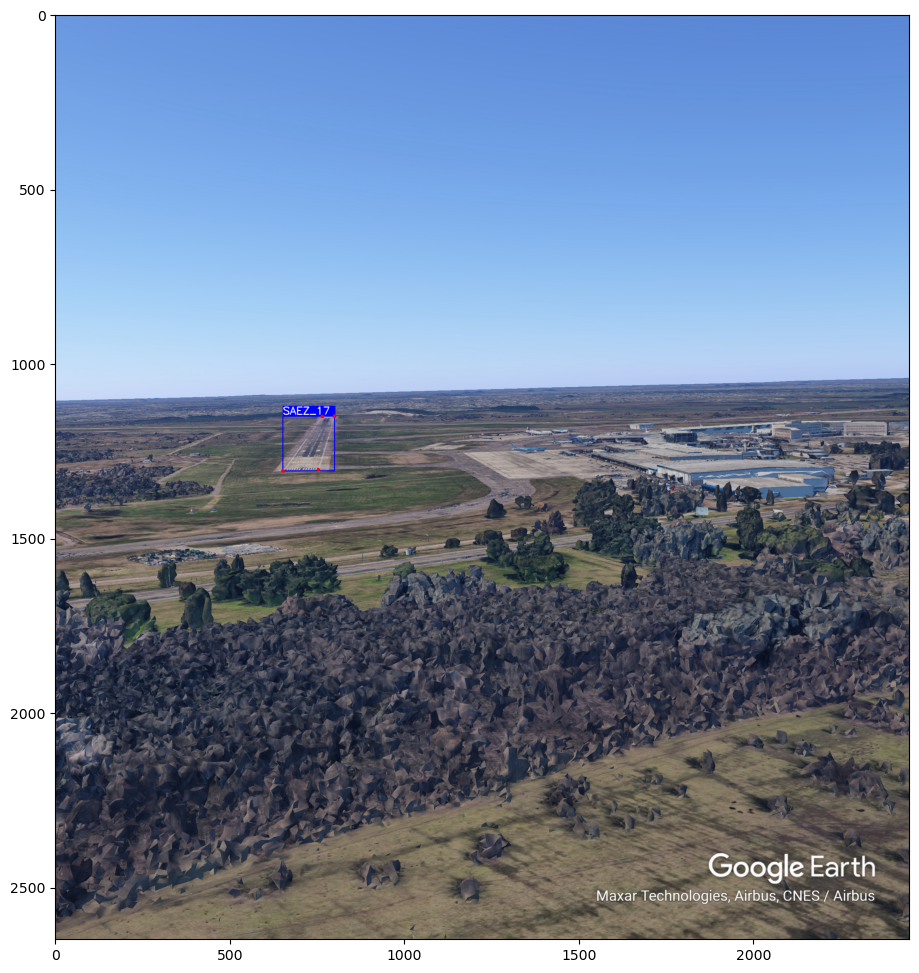

In [8]:
img_idx = 5
display_img_with_labels(dataset_labels, img_idx, save_dir=save_directory, dataset_dir=dataset_folder)
img_idx = 20
display_img_with_labels(dataset_labels, img_idx, save_dir=save_directory, dataset_dir=dataset_folder)
img_idx = 28
display_img_with_labels(dataset_labels, img_idx, save_dir=save_directory, dataset_dir=dataset_folder)